<a href="https://colab.research.google.com/github/prietykumari22/datadets/blob/main/summer_olympics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np

In [40]:
df=pd.read_csv("summer.csv")

In [41]:
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


## Q1.In how many citiessummer olympics is held so far

In [42]:
df['City'].unique()

array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

In [43]:
len(df['City'].unique())

22

## to count cites summer olympics has held

In [44]:
df['City'].unique().shape

(22,)

In [45]:
df[df['City'] =='summer olympics']

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal


In [46]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [47]:
df['Medal'].unique()

array(['Gold', 'Silver', 'Bronze'], dtype=object)

In [48]:
df[df['Medal'] == 'Gold']

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold
13,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold
...,...,...,...,...,...,...,...,...,...
31145,2012,London,Wrestling,Wrestling Freestyle,"NOROOZI, Omid Haji",IRI,Men,Wg 60 KG,Gold
31149,2012,London,Wrestling,Wrestling Freestyle,"KIM, Hyeonwoo",KOR,Men,Wg 66 KG,Gold
31153,2012,London,Wrestling,Wrestling Freestyle,"VLASOV, Roman",RUS,Men,Wg 74 KG,Gold
31157,2012,London,Wrestling,Wrestling Freestyle,"KHUGAEV, Alan",RUS,Men,Wg 84 KG,Gold


# Q2.Which sport is having most number of gold medal so far

In [49]:
df['Medal'].value_counts()

Gold      10486
Bronze    10369
Silver    10310
Name: Medal, dtype: int64

In [50]:
df=pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [51]:
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Bronze,Gold,Silver
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,0,1,0
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,0,0,1
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,1,0,0
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,0,1,0
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze,1,0,0
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold,0,1,0
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver,0,0,1
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze,1,0,0


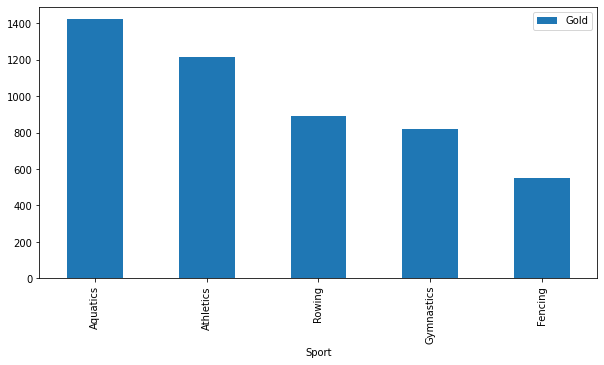

In [52]:
data=df.groupby('Sport').sum()[['Gold']].sort_values('Gold',ascending=False).reset_index().head()
data.plot(x='Sport', y='Gold',kind='bar',figsize=(10,5))

## Q3.Which sport is having most no of medal so far

In [53]:
data=[]
for Medal in df['Sport'].unique():
  data.append([Medal,len(df[df['Sport'] == Medal])])

In [54]:
data

[['Aquatics', 4170],
 ['Athletics', 3638],
 ['Cycling', 1105],
 ['Fencing', 1613],
 ['Gymnastics', 2307],
 ['Shooting', 1150],
 ['Tennis', 296],
 ['Weightlifting', 593],
 ['Wrestling', 1212],
 ['Archery', 329],
 ['Basque Pelota', 4],
 ['Cricket', 24],
 ['Croquet', 8],
 ['Equestrian', 939],
 ['Football', 1497],
 ['Golf', 30],
 ['Polo', 66],
 ['Rowing', 2667],
 ['Rugby', 192],
 ['Sailing', 1109],
 ['Tug of War', 94],
 ['Boxing', 894],
 ['Lacrosse', 59],
 ['Roque', 3],
 ['Hockey', 1422],
 ['Jeu de paume', 3],
 ['Rackets', 10],
 ['Skating', 27],
 ['Water Motorsports', 5],
 ['Modern Pentathlon', 180],
 ['Ice Hockey', 27],
 ['Basketball', 1012],
 ['Canoe / Kayak', 1002],
 ['Handball', 973],
 ['Judo', 491],
 ['Volleyball', 994],
 ['Table Tennis', 144],
 ['Badminton', 144],
 ['Baseball', 335],
 ['Softball', 180],
 ['Taekwondo', 112],
 ['Triathlon', 24],
 ['Canoe', 81]]

In [21]:
data=df.groupby('Sport').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index().head()
data

,Sport,Gold,Silver,Bronze
0,Aquatics,1421.0,1384.0,1365.0
1,Athletics,1215.0,1224.0,1199.0
2,Rowing,890.0,889.0,888.0
3,Gymnastics,820.0,756.0,731.0
4,Fencing,552.0,542.0,519.0


In [114]:
data=df.values

In [115]:
lst=[]
for Sport in df['Sport'].unique():
  str =""
  vr=0
  for i in range(len(data)):
     if (data[i][2]==Sport):
       str += data[i][8]
       vr += 1
  lst.append([Sport,vr])

In [116]:
lst

[['Aquatics', 4170],
 ['Athletics', 3638],
 ['Cycling', 1105],
 ['Fencing', 1613],
 ['Gymnastics', 2307],
 ['Shooting', 1150],
 ['Tennis', 296],
 ['Weightlifting', 593],
 ['Wrestling', 1212],
 ['Archery', 329],
 ['Basque Pelota', 4],
 ['Cricket', 24],
 ['Croquet', 8],
 ['Equestrian', 939],
 ['Football', 1497],
 ['Golf', 30],
 ['Polo', 66],
 ['Rowing', 2667],
 ['Rugby', 192],
 ['Sailing', 1109],
 ['Tug of War', 94],
 ['Boxing', 894],
 ['Lacrosse', 59],
 ['Roque', 3],
 ['Hockey', 1422],
 ['Jeu de paume', 3],
 ['Rackets', 10],
 ['Skating', 27],
 ['Water Motorsports', 5],
 ['Modern Pentathlon', 180],
 ['Ice Hockey', 27],
 ['Basketball', 1012],
 ['Canoe / Kayak', 1002],
 ['Handball', 973],
 ['Judo', 491],
 ['Volleyball', 994],
 ['Table Tennis', 144],
 ['Badminton', 144],
 ['Baseball', 335],
 ['Softball', 180],
 ['Taekwondo', 112],
 ['Triathlon', 24],
 ['Canoe', 81]]

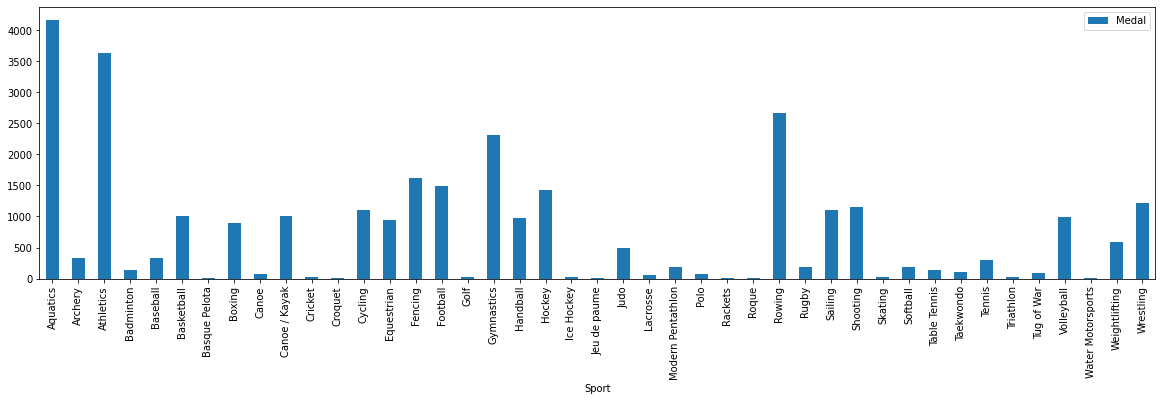

In [117]:
pd.DataFrame(lst,columns=['Sport','Medal']).sort_values(by='Sport',ascending =True).plot(x= 'Sport',y='Medal',kind='bar',figsize=(20,5))

In [118]:
df['Medal'].unique()

array(['Gold', 'Silver', 'Bronze'], dtype=object)

# Q4 which playesr has won the most no gold

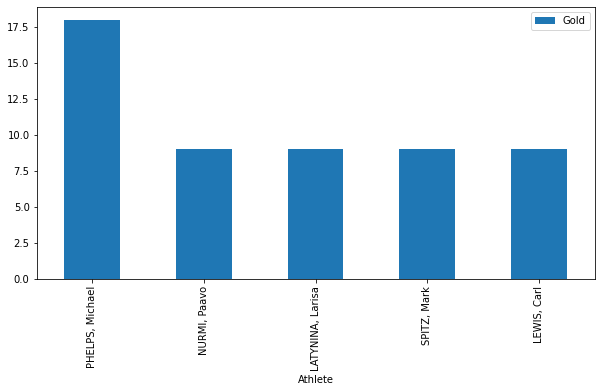

In [119]:
data=df.groupby('Athlete').sum()[['Gold']].sort_values('Gold',ascending=False).reset_index().head()
data.plot(x='Athlete', y='Gold',kind='bar',figsize=(10,5))

## Q5.which player has won most no of gold medals

In [105]:
data=df.groupby('Athlete').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index().head()

In [106]:
data

,Athlete,Gold,Silver,Bronze
0,"PHELPS, Michael",18,2,2
1,"NURMI, Paavo",9,3,0
2,"LATYNINA, Larisa",9,5,4
3,"SPITZ, Mark",9,1,1
4,"LEWIS, Carl",9,1,0


In [124]:
data=df.values
data

array([[1896, 'Athens', 'Aquatics', ..., 0, 1, 0],
       [1896, 'Athens', 'Aquatics', ..., 0, 0, 1],
       [1896, 'Athens', 'Aquatics', ..., 1, 0, 0],
       ...,
       [2012, 'London', 'Wrestling', ..., 0, 0, 1],
       [2012, 'London', 'Wrestling', ..., 1, 0, 0],
       [2012, 'London', 'Wrestling', ..., 1, 0, 0]], dtype=object)

In [ ]:
lst=[]
for Athlete in df['Athlete'].unique():
  
  vr=0
  for i in range(len(data)):
     if (data[i][4]==Athlete):
        vr += 1
  lst.append([Athlete,vr])

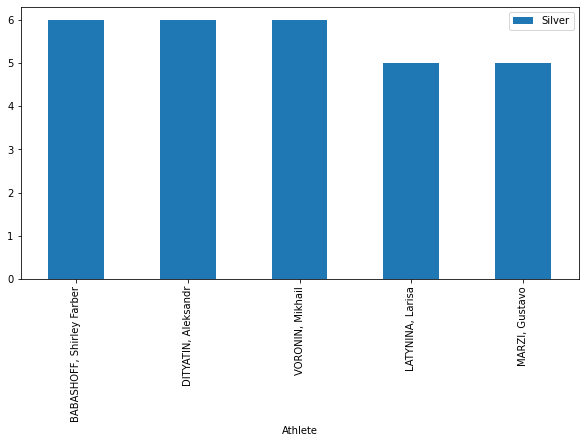

In [125]:
data=df.groupby('Athlete').sum()[['Gold','Silver','Bronze']].sort_values('Silver',ascending=False).reset_index().head()
data.plot(x='Athlete', y='Silver',kind='bar',figsize=(10,5))

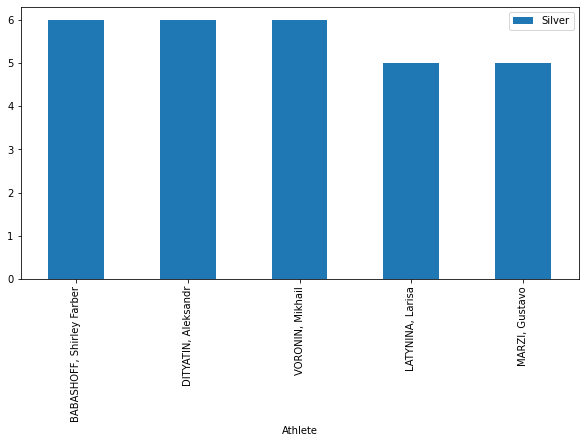

In [126]:
data=df.groupby('Athlete').sum()[['Gold','Silver','Bronze']].sort_values('Silver',ascending=False).reset_index().head()
data.plot(x='Athlete', y='Silver',kind='bar',figsize=(10,5))

## Q6 In which year india won first gold medal in summer olympics

In [101]:
data=df.values

In [103]:
df[df['Country'] =='IND']

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Bronze,Gold,Silver
241,1900,Paris,Athletics,Athletics,"PRITCHARD, Norman",IND,Men,200M,Silver,0,0,1
244,1900,Paris,Athletics,Athletics,"PRITCHARD, Norman",IND,Men,200M Hurdles,Silver,0,0,1
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold,0,1,0
5513,1928,Amsterdam,Hockey,Hockey,"CHAND, Dyan",IND,Men,Hockey,Gold,0,1,0
5514,1928,Amsterdam,Hockey,Hockey,"GATELEY, Maurice A.",IND,Men,Hockey,Gold,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29879,2012,London,Boxing,Boxing,"KOM, Mary",IND,Women,51 KG,Bronze,1,0,0
30841,2012,London,Shooting,Shooting,"NARANG, Gagan",IND,Men,10M Air Rifle,Bronze,1,0,0
30849,2012,London,Shooting,Shooting,"KUMAR, Vijay",IND,Men,25M Rapid Pistol,Silver,0,0,1
31111,2012,London,Wrestling,Wrestling Freestyle,"DUTT, Yogeshwar",IND,Men,Wf 60 KG,Bronze,1,0,0


In [109]:
data=df.values


'Gold'

Q7 WHICH EVENT IS MOST POPULAR IN TERMS ON NO OF PLAYERS